<div id="header">
    <p style="color:black; text-align:center; font-weight:bold; font-family:Tahoma, sans-serif; font-size:24px;">
        Normalization - Min Max Scaler
    </p>
</div>

Normalization is a type of feature scaling that transforms the features into a specific range, usually between 0 and 1. This technique is especially useful when you know the data does not follow a normal distribution or when working with algorithms that don't assume any particular distribution.  The purpose of this scaler is to ensure that all features contribute equally to the machine learning model by bringing them to a uniform scale.

Formula for Min Max Scaler:

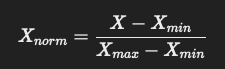

Where:

X is the original feature value,

X***min*** is the minimum value of the feature,

X***max*** is the maximum value of the feature.

After applying normalization, the values of the feature will be scaled between 0 and 1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('wine_data.csv')

In [ ]:
df.head(10)

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [ ]:
df.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [ ]:
df["Class Label"].unique()

array([1, 2, 3])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
#Dividing features and traget variables
X = df[["Alcohol","Malic Acid"]]
y = df["Class Label"]

In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
# Shape of Training and Testing Set
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [ ]:
m = MinMaxScaler()

In [ ]:
# Fitting and Transforming Data
X_train_scaled = m.fit_transform(X_train)
X_test_scaled = m.transform(X_test)

In [ ]:
#Converted into dataframe otherwise it will result in numpy array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.1,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.4,1.6
50%,13.1,1.9
75%,13.7,3.0
max,14.8,5.8


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


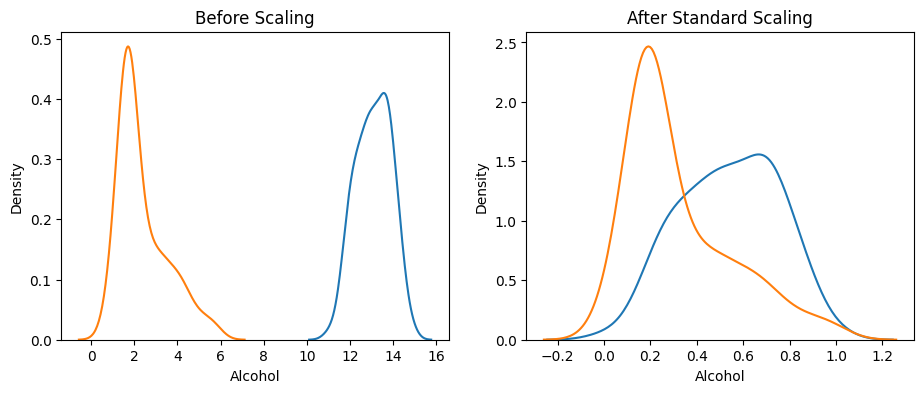

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

**NOTE:**

(i) Before Scaling the original data distributions of Alcohol and Malic Acid are significantly different in terms of range and spread.

(ii) After Scaling both features (Alcohol and Malic Acid) now share the same range, with values normalized between 0 and 1. The KDE plots show that both features have been rescaled to the same relative scale while preserving the original shape of their distributions.